<a href="https://colab.research.google.com/github/HwangHanJae/ai_13_project/blob/main/project1/AI_13_%ED%99%A9%ED%95%9C%EC%9E%AC_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

다음 분기에 어떤 게임을 설계해야 하는가?  

--> **구체화를 시켜서 다음 분기에는 일본과 일본외의 지역에 어떤 게임을 설계해야 하는가**

- 연도별 게임의 트렌드가 있는가
- 지역에 따라서 선호하는 게임 장르가 다른가
- 출고량이 높은 게임에 대한 분석 및 프로세스

# Data Description

`Name` : 게임의 이름  
`Platform` : 게임이 지원되는 플랫폼의 이름  
`Year` : 게임이 출시된 연도  
`Genre` : 게임의 장르  
`Publisher` : 게임을 제작한 회사  
`NA_Sales` : 북미지역에서의 출고량  
`EU_Sales` : 유럽지역에서의 출고량  
`JP_Sales` : 일본지역에서의 출고량  
`Other_Sales` : 기타지역에서의 출고량  

#데이터 확인 및 전처리

In [ ]:
#라이브러리 로드 및 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/vgames2.csv")
df.head(3)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [ ]:
#데이터의 크기 확인
df.shape

(16598, 10)

In [ ]:
#결측치가 존재하는 것을 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#결측치 데이터 확인
null_df = df.loc[(df['Year'].isnull())|(df['Genre'].isnull())|(df['Publisher'].isnull())]
null_df.head(3)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0


In [ ]:
#결측치 데이터 수
null_df.shape

(357, 10)

In [ ]:
#2퍼센트 정도의 데이터가 결측치 확인
round((null_df.shape[0] / df.shape[0]) * 100, 2)

2.15

In [ ]:
#2퍼센트 정도는 제거해도 분석을 하는데 큰 영향이 없을 것이라 판단하여 제거
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#불필요한 컬럼 제거
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
#출고량 피처 확인
#데이터에 M,K와 같은 문자값이 적용이 되있는것을 확인할 수 있음
#M은 백만, K는 천 단위로 판단
#아무것도 없는 값도 백만으로 판단하여 백만단위 기준으로 변환
df.loc[df['NA_Sales'].str.find("M") != -1].head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
439,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
450,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
568,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15


In [ ]:
df.loc[df['NA_Sales'].str.find("K") != -1].head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0


In [ ]:
#출고량(Sales) 데이터를 M단위를 기준으로 변환하는 함수 작성
def change_sales(x):
  if "M" in x:
    x = float(x.replace("M",''))
    return x
  elif "K" in x:
    x = float(x.replace("K",''))
    x = x * 0.001
    return x
  else:
    x = float(x)
    return x

In [ ]:
#단위 변환 후 확인
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
for feature in sales_features:
  df[feature] = df[feature].apply(change_sales)
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.0,0.02,0.00


In [ ]:
#Year 컬럼을 확인하니 3, 9, 96과 같은 100보다 작은 값의 형태를 볼 수 있음
#80보다 작은 값은 2000을, 80보다 크고 100보다 작은 값을 1900을 더해주어서 값을 맞추어줌

def year_change(x):
  if 80 <= x <100:
    x += 1900
    return x
  elif x < 80:
    x += 2000
    return x
  else:
    return x

df['Year'] = df['Year'].astype('int')
df['Year'] = df['Year'].apply(year_change)
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00


In [ ]:
#Sales 칼럼을 모두 더한 피처 생성
df['ALL_Sales'] = df[sales_features].sum(axis=1)

#EDA

## 일본과 일본 외 지역(북미, 유럽, 기타)으로 나누는 이유


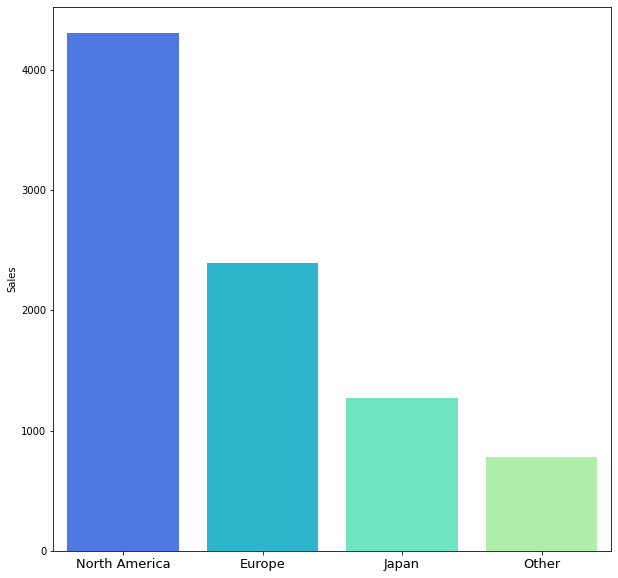

In [ ]:
#전체 판매(출고)량의 크기
sns.set_palette('rainbow')
sales = pd.DataFrame(df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum(), columns=['Sales'])
plt.figure(figsize=(10,10))
sns.barplot(data=sales, ci= None, y="Sales", x=sales.index)
plt.xticks(ticks=[0,1,2,3],labels=["North America", "Europe", "Japan", "Other"], fontsize=13)
plt.show()

지역별 판매 출고량입니다.

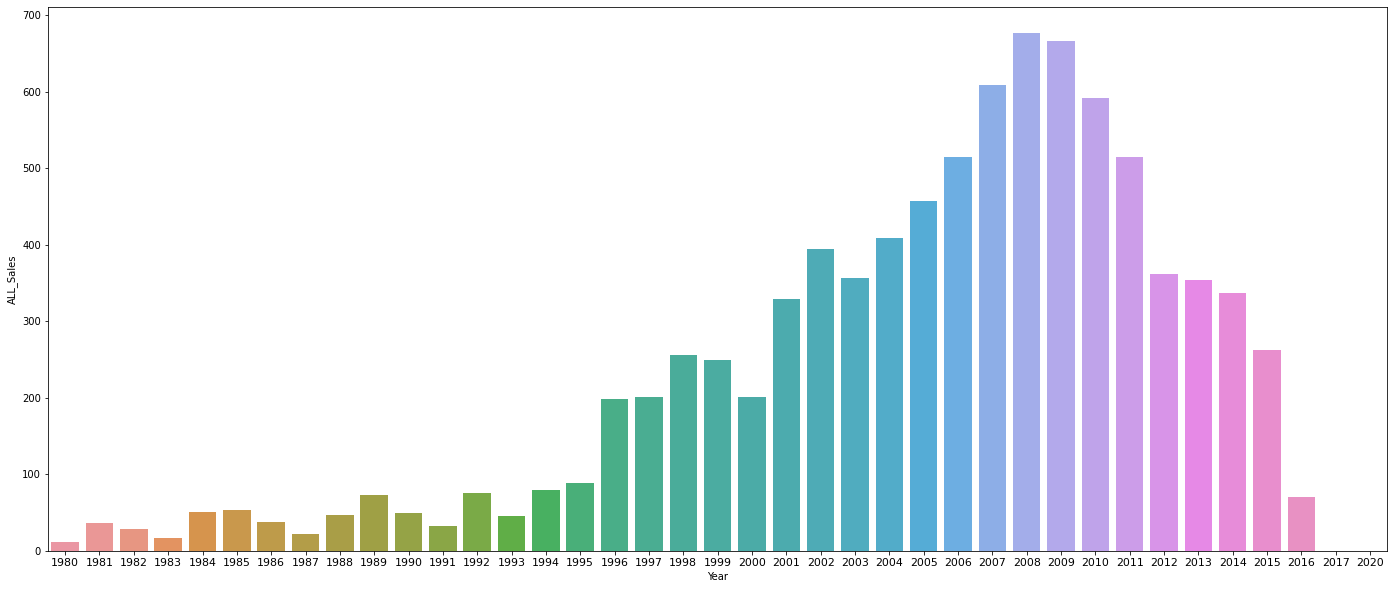

In [ ]:
#연도별 전체 판매량
year_all_sales = pd.DataFrame(df.groupby('Year')["ALL_Sales"].sum())
plt.figure(figsize=(24,10))
sns.barplot(data=year_all_sales, x=year_all_sales.index, y='ALL_Sales', ci=None)
plt.xticks(fontsize=11)
plt.show()

연도별 전체 지역 판매 출고량 입니다.

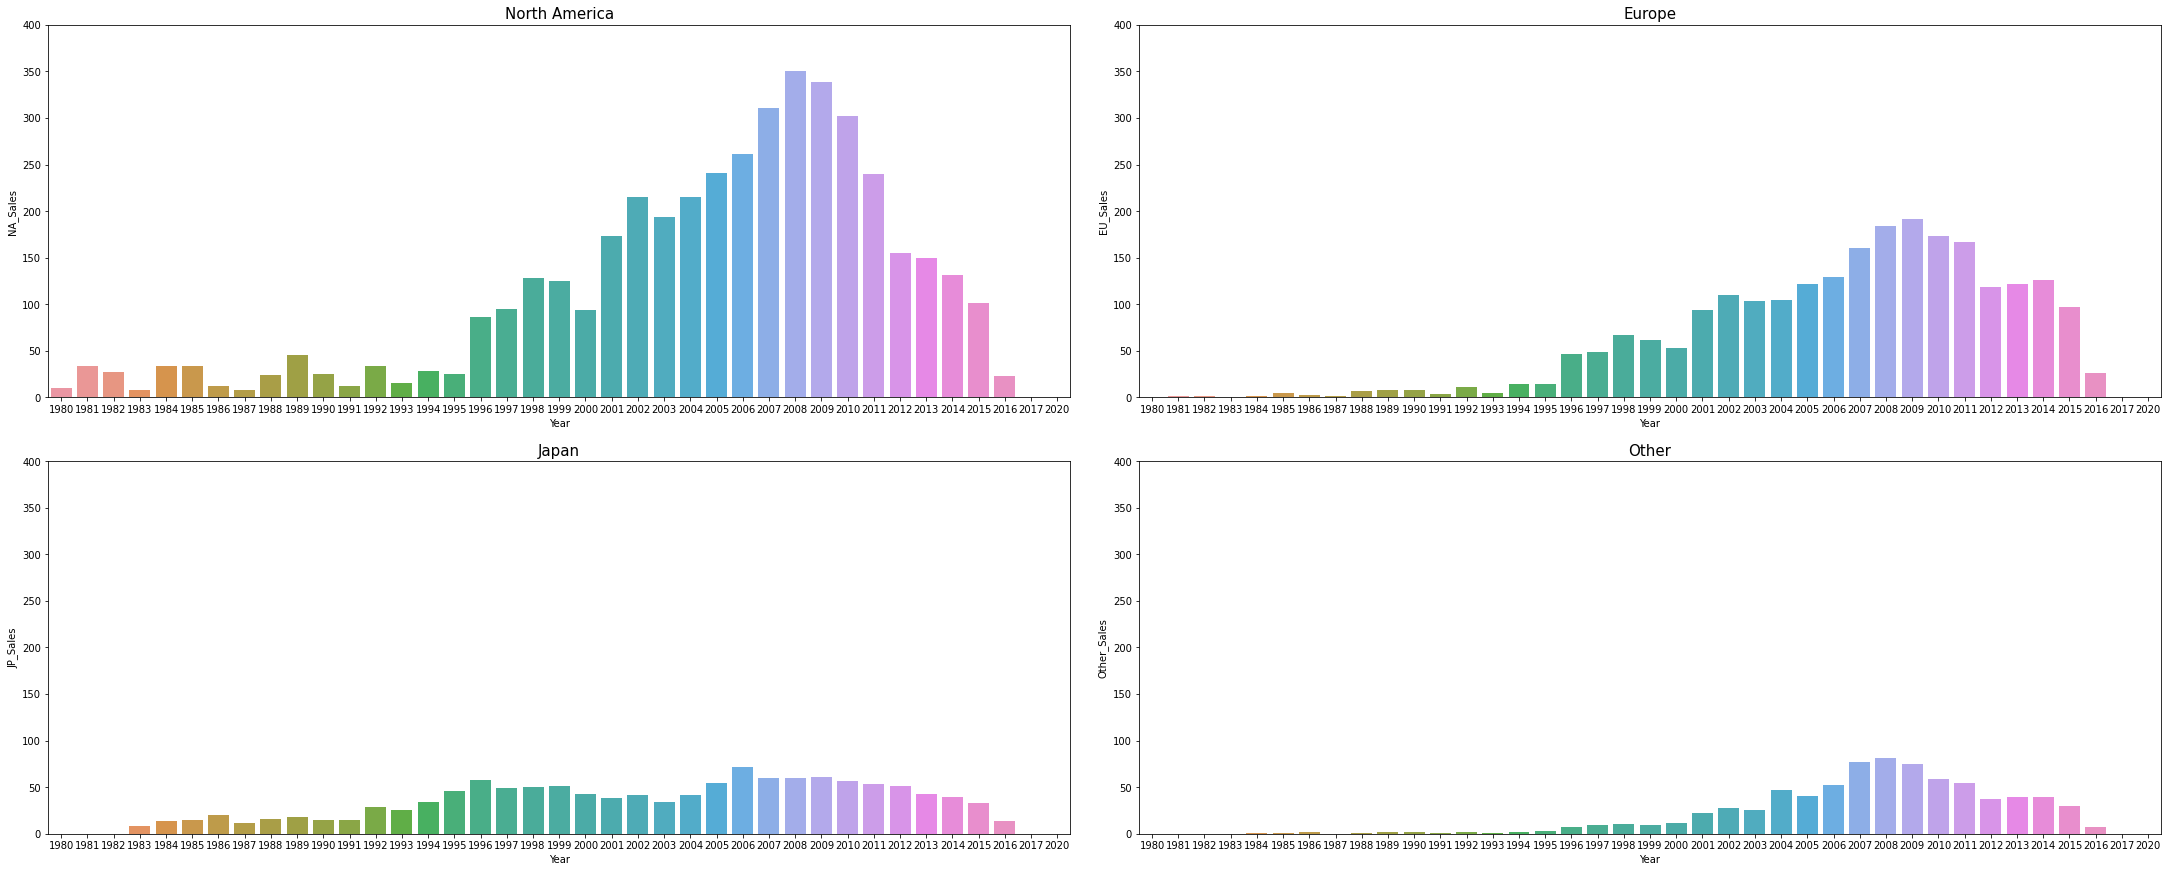

In [ ]:
#연도별 지역 판매량
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(30, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  year_games = pd.DataFrame(df.groupby("Year")[feature].sum())
  sns.barplot(data=year_games, x=year_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_ylim(0, 400)
plt.show()

북미,유럽,기타 지역과 일본의 판매량의 모습이 다른것을 확인할 수 있습니다.

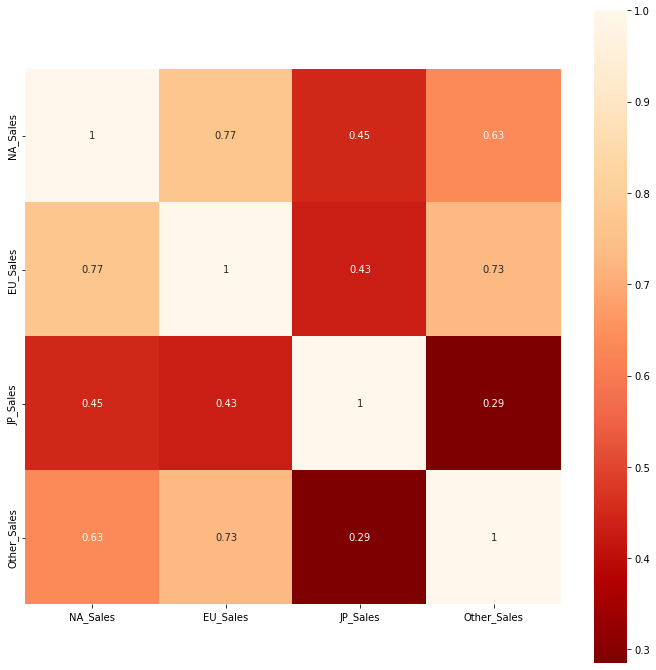

In [ ]:
sales_corr = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].corr()
plt.figure(figsize=(12,12))
sns.heatmap(sales_corr, annot=True, square=True,cmap="OrRd_r")
plt.show()

상관관계는 두변수 간의 관계를 알아볼 수 있으며, 값이 -1~1의 값을 가집니다.  
음수라면 음의 상관관계, 양수라면 양의 상관관계, 0이라면 상관이 매우 약하다라고 해석할 수 있습니다.


출고량들간의 상관관계를 확인한 결과 북미,유럽,기타 지역과의 상관관계에 비하여   
일본 과의 상관관계가 상대적으로 작기 때문에 일본과 일본외지역으로 나누게 되누게 되었습니다.

앞으로 진행할 분석결과도 일본과 일본외의 지역이 다른 모습을 보이기 때문에 나누는 이유가 되었습니다.

## 지역에 따라 선호하는 게임의 장르를 확인

지역 전체의 장르별 출고량을 확인하겠습니다

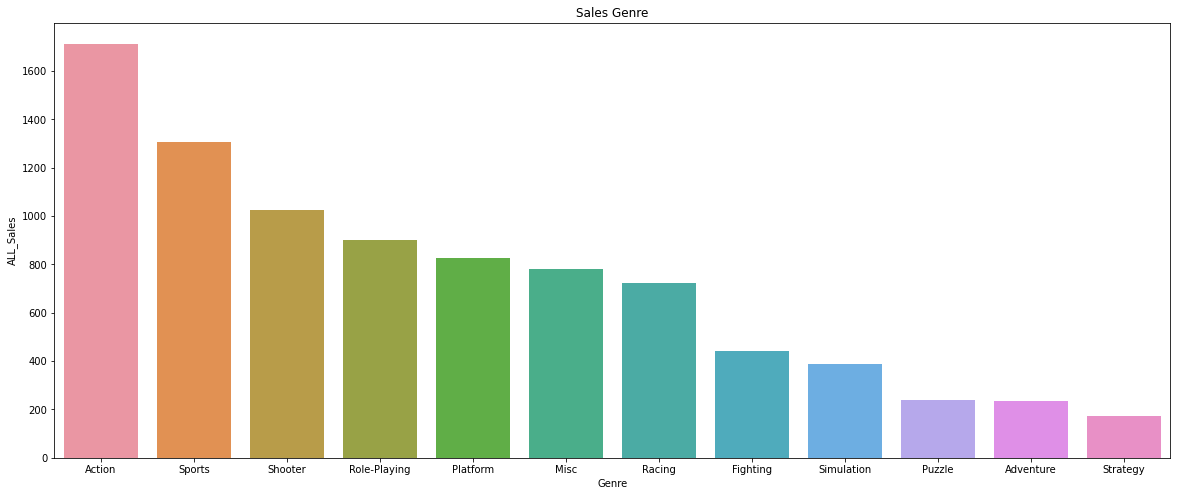

In [ ]:
#어떤 장르가 가장 많이 판매되었는가
genre_all_sales = pd.DataFrame(df.groupby("Genre")['ALL_Sales'].sum().sort_values(ascending=False))
plt.figure(figsize=(20,8))
ax = sns.barplot(data=genre_all_sales, x=genre_all_sales.index, y='ALL_Sales', ci=None)
plt.title("Sales Genre")

plt.show()

전체 지역에서는 Action, Sports, Shooter 순으로 게임이 많이 출고되었습니다.

다음은 지역별로 어떤 장르가 많이 출고되었는지 확인해보겠습니다.

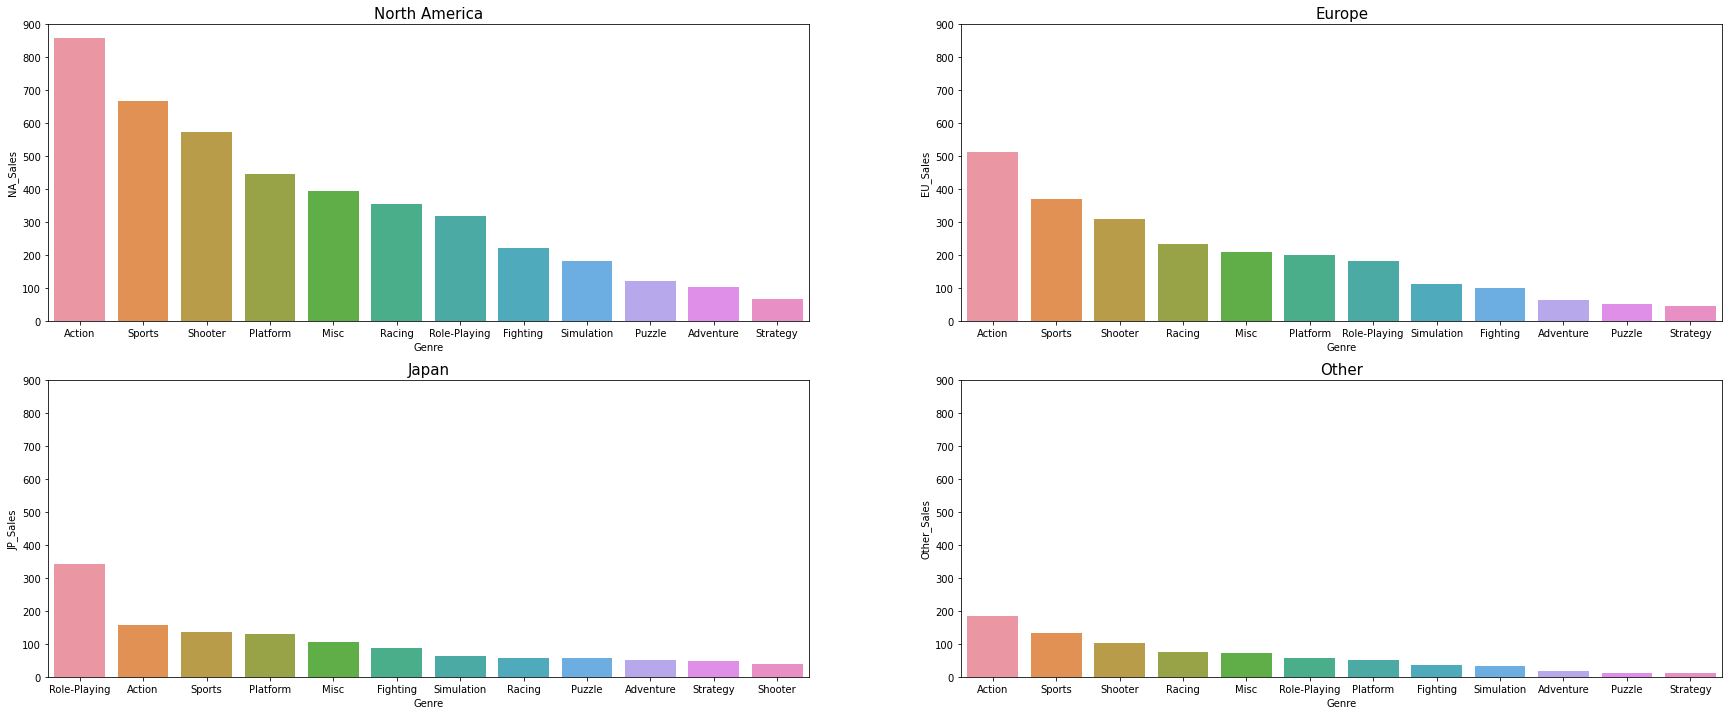

In [ ]:
#어떤 장르가 지역마다 가장 많이 판매되었는가
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(30, 12))
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:  
  genre_sales = pd.DataFrame(df.groupby("Genre")[feature].sum().sort_values(ascending=False))
  sns.barplot(data = genre_sales, x=genre_sales.index, y=feature, ci=None, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_ylim(0, 900)
plt.show()

일본과 다른지역을 보았을 때 순위는 다르지만 Action, Sports, Shooter 게임장르가 출고량이 높은 것을 확인할 수 있고,  
일본의 경우 다른지역과 다르게 Role-Playing 장르의 출고량이 가장 높습니다.

## 지역에 따라 선호하는 게임 플랫폼을 확인

플랫폼의 수가 31개로 모든 플랫폼을 확인할 수 없기 때문에 상위 10개의 플랫폼만 뽑아서 확인해보도록 하겠습니다.

In [ ]:
print("Platform의 수 : ", df['Platform'].nunique())

Platform의 수 :  31


전체 지역을 확인해보도록 하겠습니다.

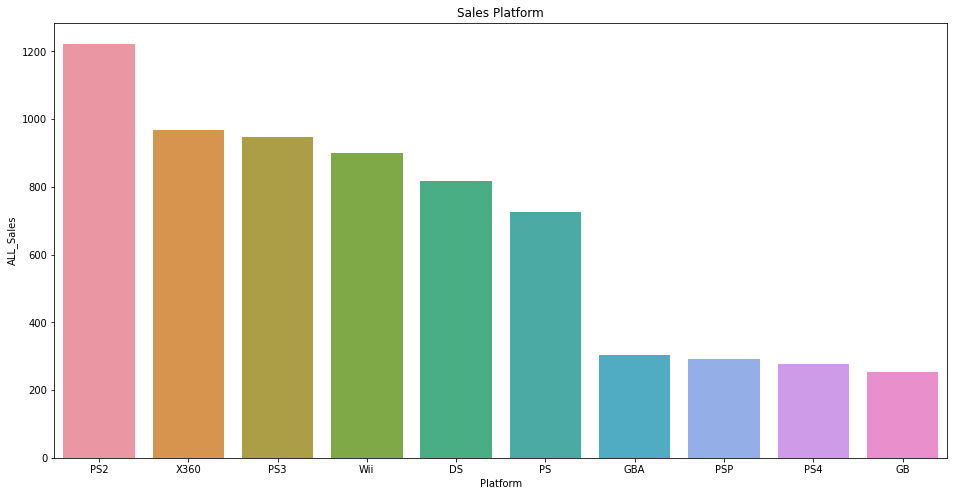

In [ ]:
#전체 지역의 플랫폼 출고량
platform_all_sales = pd.DataFrame(df.groupby("Platform")['ALL_Sales'].sum().sort_values(ascending=False))[:10]
plt.figure(figsize=(16,8))
sns.barplot(data=platform_all_sales, x=platform_all_sales.index, y='ALL_Sales',ci=None)
plt.title("Sales Platform")
plt.show()

전체 지역으로 보았을 때 PS2, X360, PS3 플랫폼 순으로 게임을 이용하였습니다.

다음은 지역별로 어떤 플랫폼을 가장 많이 이용했는지 확인하겠습니다.

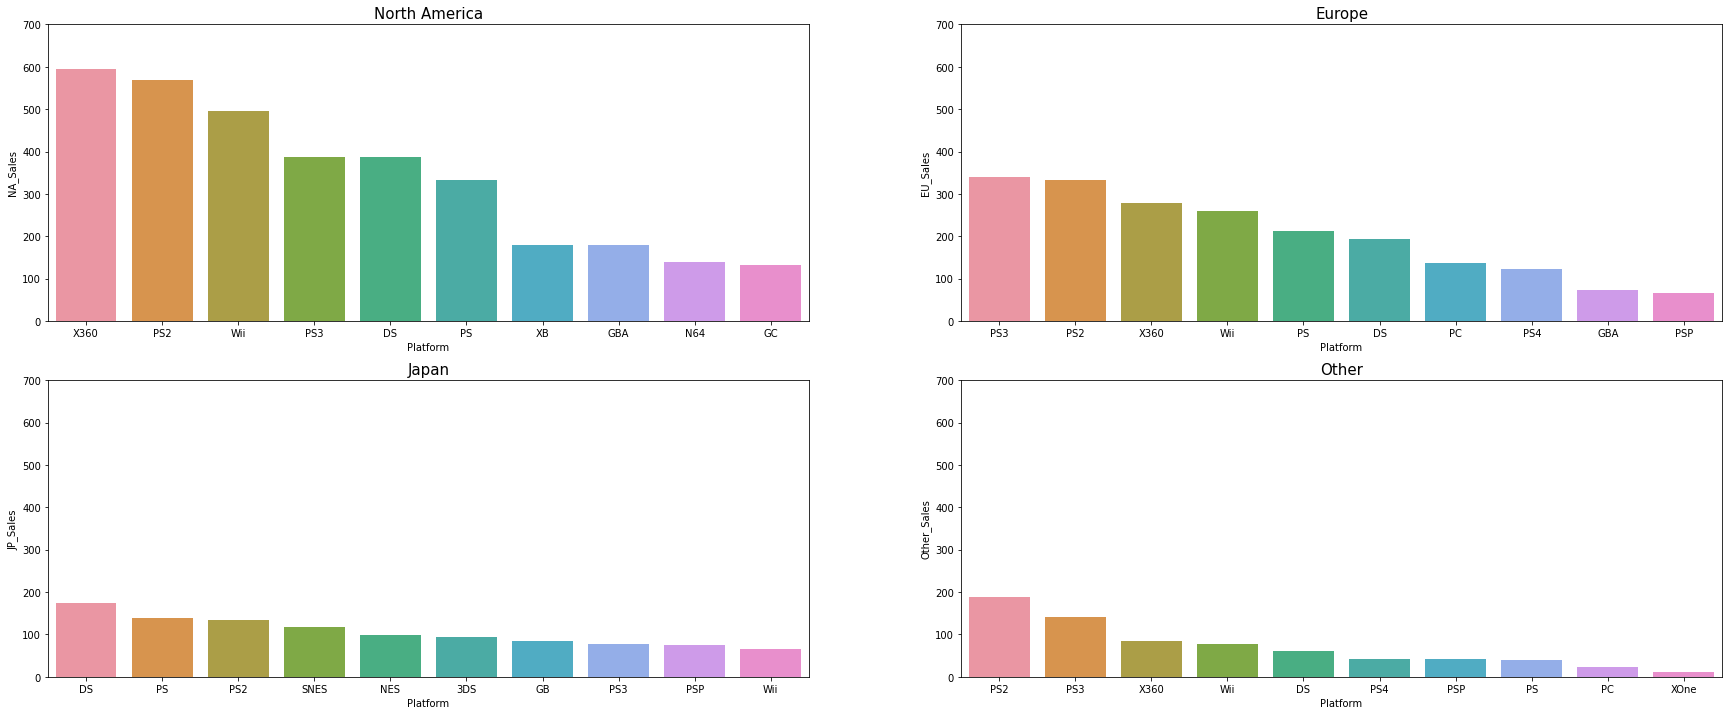

In [ ]:
#지역별로 어떤 플랫폼이 가장 많이 판매되었는가
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(30, 12))
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  platform_sales = pd.DataFrame(df.groupby("Platform")[feature].sum().sort_values(ascending=False))[:10]
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sns.barplot(data = platform_sales, x=platform_sales.index, y=feature, ci=None, ax=sales_name[feature][1])
  sales_name[feature][1].set_ylim(0, 700)
plt.show()

순위는 각자 다르지만 북미, 유럽, 기타의 경우에는 X360, PS2, Wii, PS3를 많이 이용하였고,  
일본의 경우는 DS의 플랫폼이 가장 많고, PS, PS2 순으로 많이 이용하였습니다.

## 지역에 따라 선호하는 게임회사를 확인

회사의 수가 500개 이상으로 많기 때문에 플랫폼과 동일하게 상위 10개만 확인해보겠습니다.

In [ ]:
print("회사의 수 : ", df['Publisher'].nunique())

회사의 수 :  575


먼저 어떤 회사의 게임이 가장 많이 출고되었는가 확인하겠습니다.

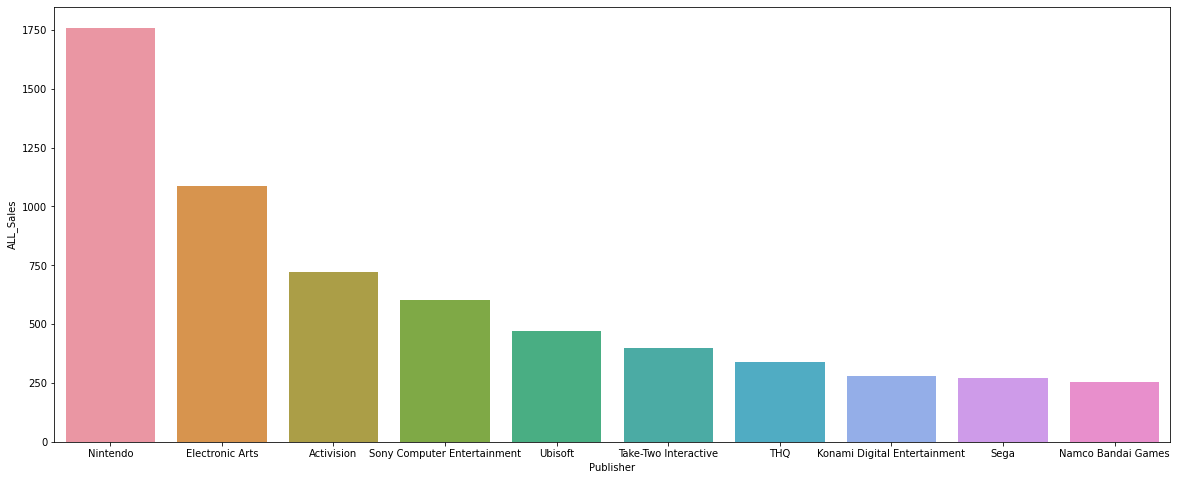

In [ ]:
#어떤 회사의 게임이 가장 많이 출고되었는가
publisher_all_sales = pd.DataFrame(df.groupby("Publisher")['ALL_Sales'].sum().sort_values(ascending=False))[:10]
plt.figure(figsize=(20,8))
sns.barplot(data=publisher_all_sales, x=publisher_all_sales.index, y='ALL_Sales',ci=None)
plt.show()

전체 지역의 경우 Nintendo, Electronic Arts, Activision 순으로 게임이 많이 출고되었습니다.

지역별로 어떤 회사의 게임이 많이 출고되었는지 확인하겠습니다.

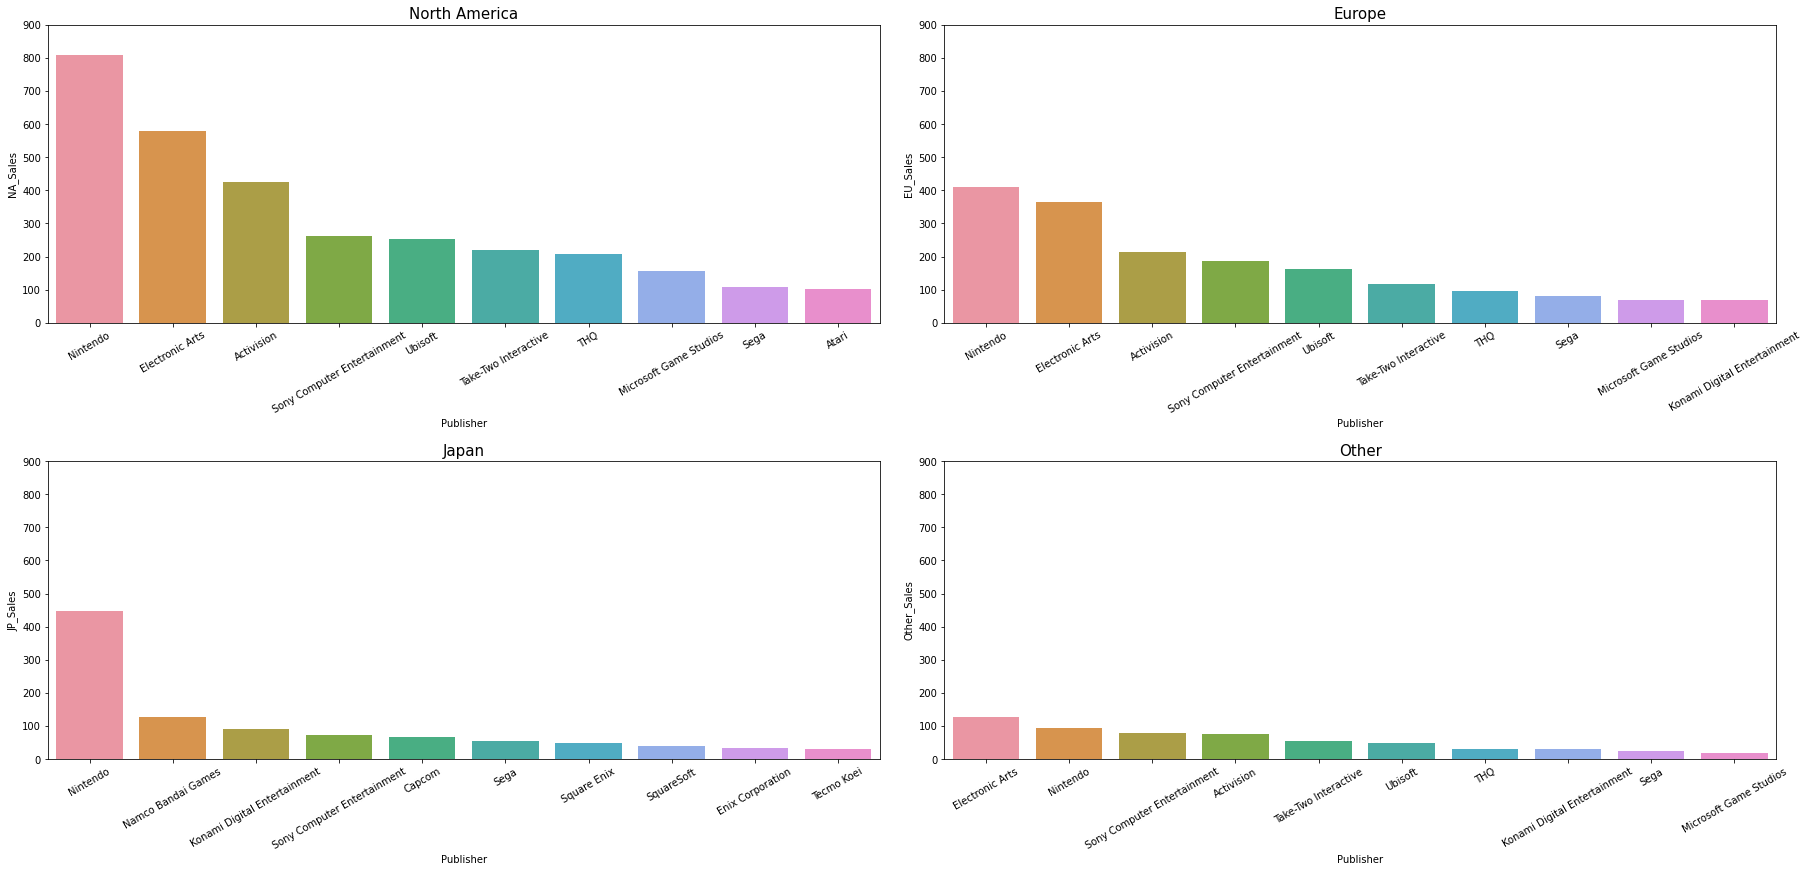

In [ ]:
#지역별로 어떤 회사의 게임이 가장 많이 판매 되었는가
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  publisher_sales = pd.DataFrame(df.groupby("Publisher")[feature].sum().sort_values(ascending=False))[:10]
  sns.barplot(data = publisher_sales, x=publisher_sales.index, y=feature, ci=None, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(publisher_sales.index, rotation=30, ha='center')
  sales_name[feature][1].set_ylim(0,900)
plt.show()

북미,유럽,기타 지역의 경우 순위는 다르지만 Nintendo, Electronic Arts, Activision 회사가 많이 출고되었고,  
일본의 경우 역시 Nintendo가 가장 많이 출고되었지만, 그 다음은 다른 지역과 차이가 나는 모습을 볼 수 있습니다.

## 출고량이 높은 게임을 확인

출시된 게임의 수가 10000개 이상으로 많기 때문에 출고량 기준으로 상위 10개의 게임만 확인해보도록 하겠습니다.

In [ ]:
print("출시된 게임의 수 : ", df['Name'].nunique())

출시된 게임의 수 :  11295


전체 지역으로 보았을 때 가장 많이 출고된 게임을 확인하겠습니다.

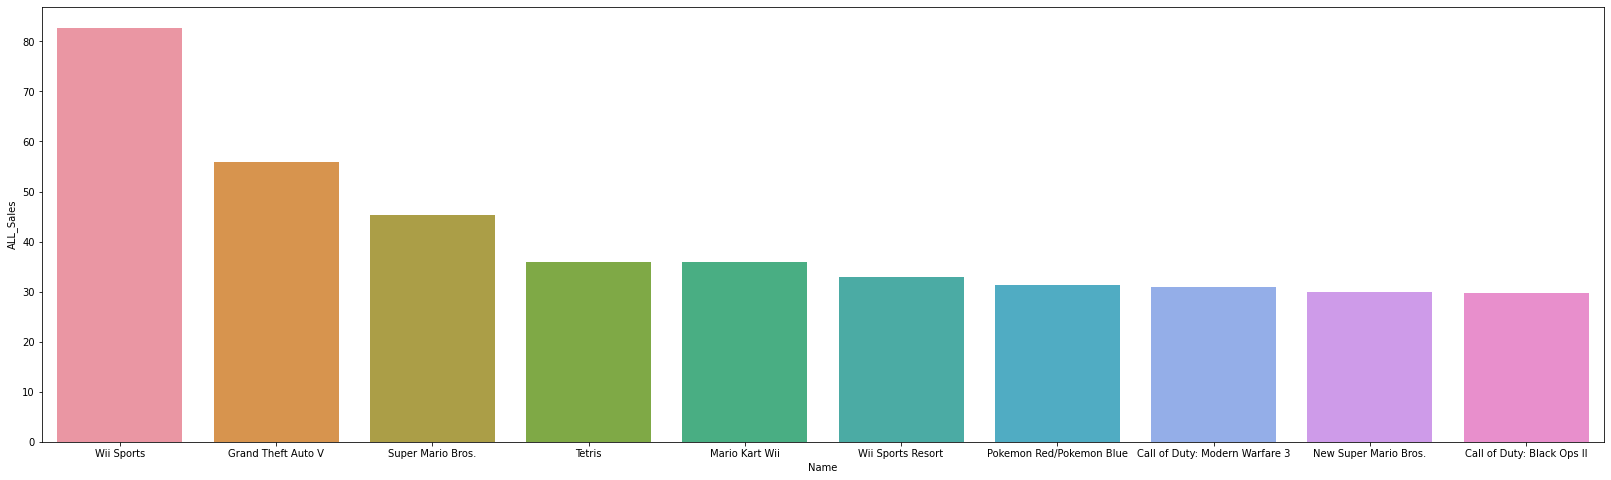

In [ ]:
#가장 많이 판매된 게임 top 10
top10_game = pd.DataFrame(df.groupby("Name")['ALL_Sales'].sum().sort_values(ascending=False)[:10])
plt.figure(figsize=(28, 8))
sns.barplot(data=top10_game, x=top10_game.index, y='ALL_Sales')
plt.show()

전체 지역으로 보았을 때 Wii Sports, Grand Theft Auto V, Super Mario Bros 게임 순으로 많이 출고되었습니다.

지역별로 많이 출고된 게임을 확인하겠습니다.

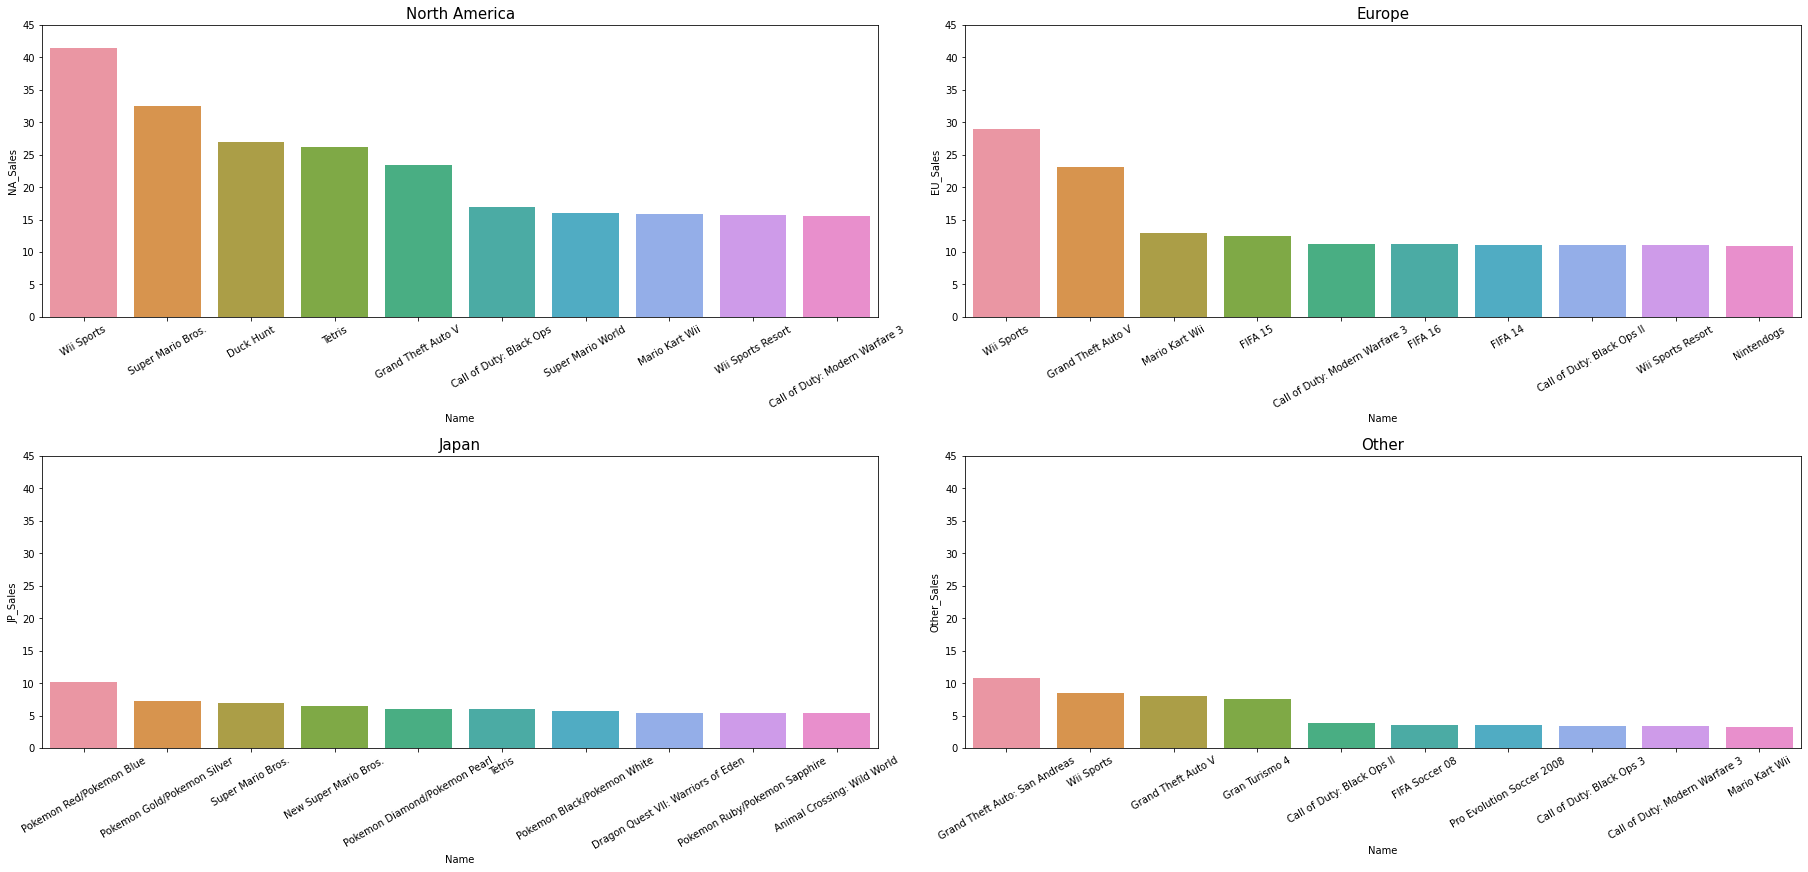

In [ ]:
#지역별 Top10 게임
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  top10_games = pd.DataFrame(df.groupby("Name")[feature].sum().sort_values(ascending=False)[:10])
  sns.barplot(data=top10_games, x=top10_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(top10_games.index, rotation=30)
  sales_name[feature][1].set_ylim(0, 45)
plt.show()

지역마다 다른 결과가 나왔지만, 위에서 보았던 전체지역을 기준으로 출고량 상위 10개의 게임을 확인했을때의 결과인 wii sports, Grand Theft Auto 5 게임이 지역마다 상위권에 위치한 것을 볼 수 있습니다.  
일본의 경우는 Pokemon 게임의 시리즈가 많이 출고된 것을 확인할 수 있습니다.

### Wii Sports 정보

In [ ]:
df.loc[df["Name"].str.contains("Wii Sports")].sort_values(by="ALL_Sales", ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2249,Wii Sports Club,WiiU,2014,Sports,Nintendo,0.19,0.14,0.04,0.03,0.40


Wii Sports 게임의 장르는 Sports, 회사는 Nintendo 입니다.

Pokemon 시리즈 게임을 일본에서의 출고량을 기준으로 상위 10개를 확인해보았습니다.  
대부분의 장르가 Role-Playing이며, 회사는 Nintendo입니다.

### Grand Theft Auto 시리즈 정보

In [ ]:
df.loc[df["Name"].str.contains("Grand Theft Auto")].sort_values(by="ALL_Sales", ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
14355,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
5226,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9597,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
13626,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
16120,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
751,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
6468,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.09


### FIFA 시리즈 정보

In [ ]:
df.loc[df["Name"].str.contains("FIFA")].sort_values(by="ALL_Sales", ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
2587,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
8857,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
2671,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
13203,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
3022,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
12203,FIFA Soccer 13,X360,2012,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.17
9993,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
14154,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
15144,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
7708,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2.93,0.01,0.46,4.32


###Pokemon 시리즈의 정보

In [ ]:
df.loc[df["Name"].str.contains("Pokemon")].sort_values(by="JP_Sales", ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9233,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
10345,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10410,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10698,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
4704,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
1780,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
15337,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34
4163,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
15551,Pokemon Mystery Dungeon: Explorers of Time/Exp...,DS,2007,Role-Playing,Nintendo,1.85,1.20,1.54,0.37,4.96


###Call of Duty 시리즈의 정보

In [ ]:
df.loc[df["Name"].str.contains("Call of Duty")].sort_values(by="ALL_Sales", ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
2757,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
6119,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
8892,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4152,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6257,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
6107,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.52
13814,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
9733,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
8208,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
5489,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


## 연도별 트렌드 분석

### 장르 분석

#### Action


지역별 Action 장르의 판매량을 확인해보겠습니다.

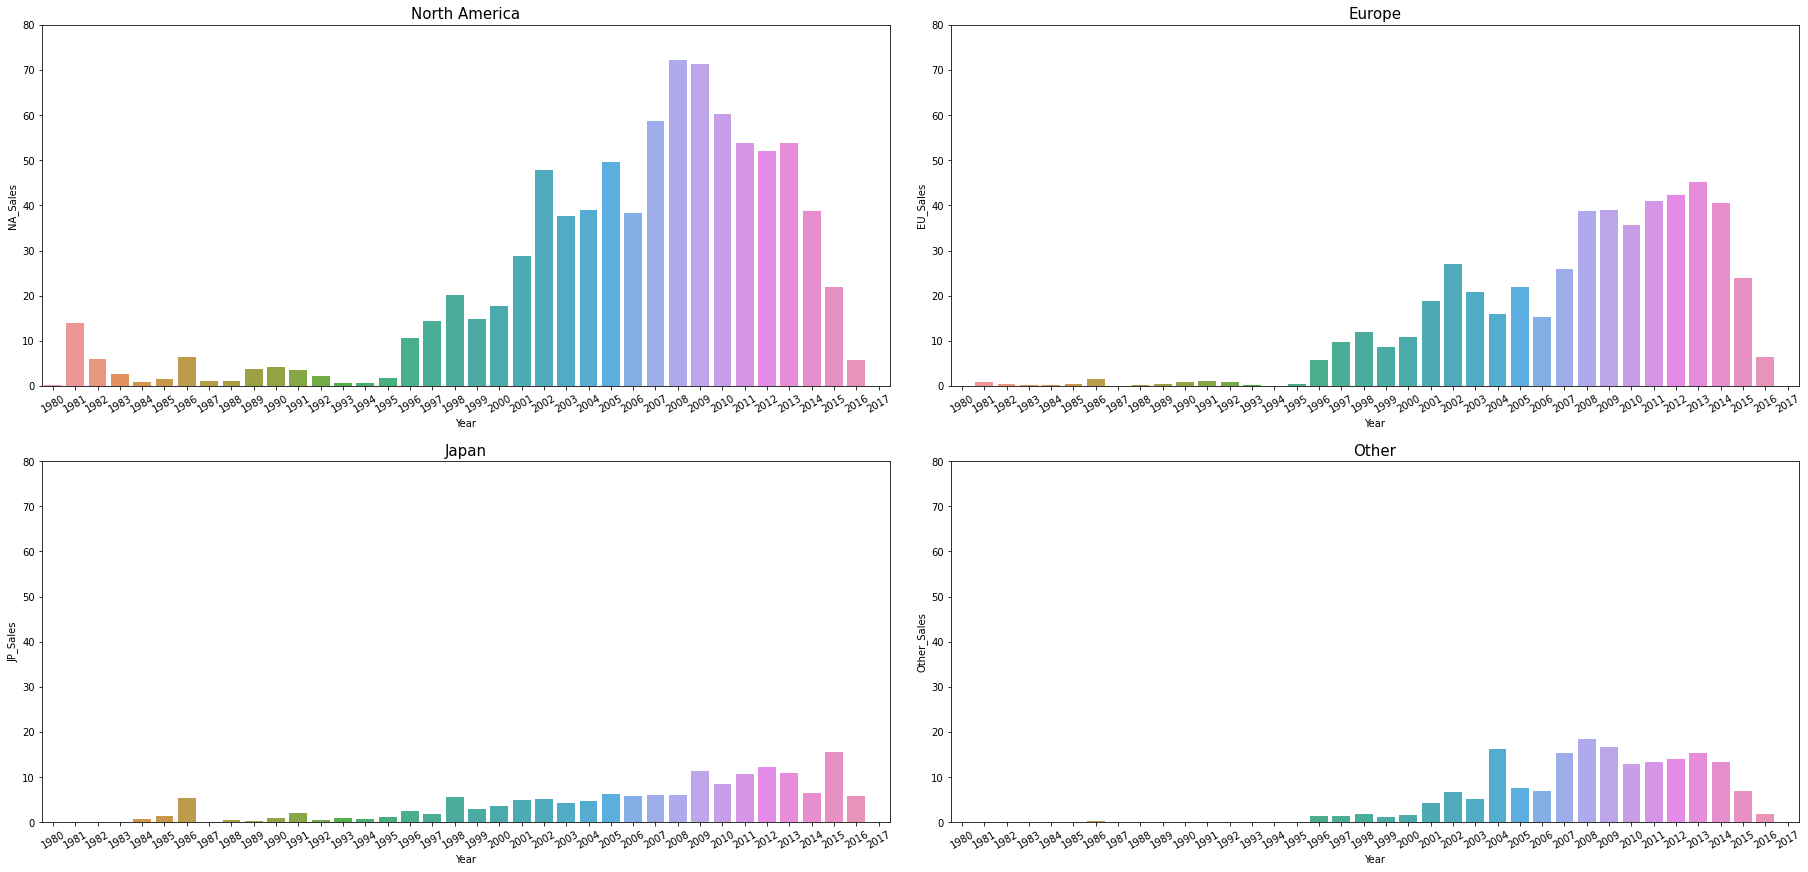

In [ ]:
#연도별 지역의 Action 판매량
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  year_games = pd.DataFrame(df.loc[df['Genre']=="Action"].groupby("Year")[feature].sum())
  sns.barplot(data=year_games, x=year_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(year_games.index, rotation=30)
  sales_name[feature][1].set_ylim(0,80)
plt.show()

일본을 제외하고 다른 지역에서는 2001년도 이후에 판매량이 증가하는 것을 볼 수 있고,2009년도 이후에 떨어지는 것을 볼 수 있습니다.  
2008, 2009에 가장 판매량이 높은 것을 확인할 수 있습니다.

#### Sports

연도별 지역의 Sports 장르 판매량을 확인해 보겠습니다.

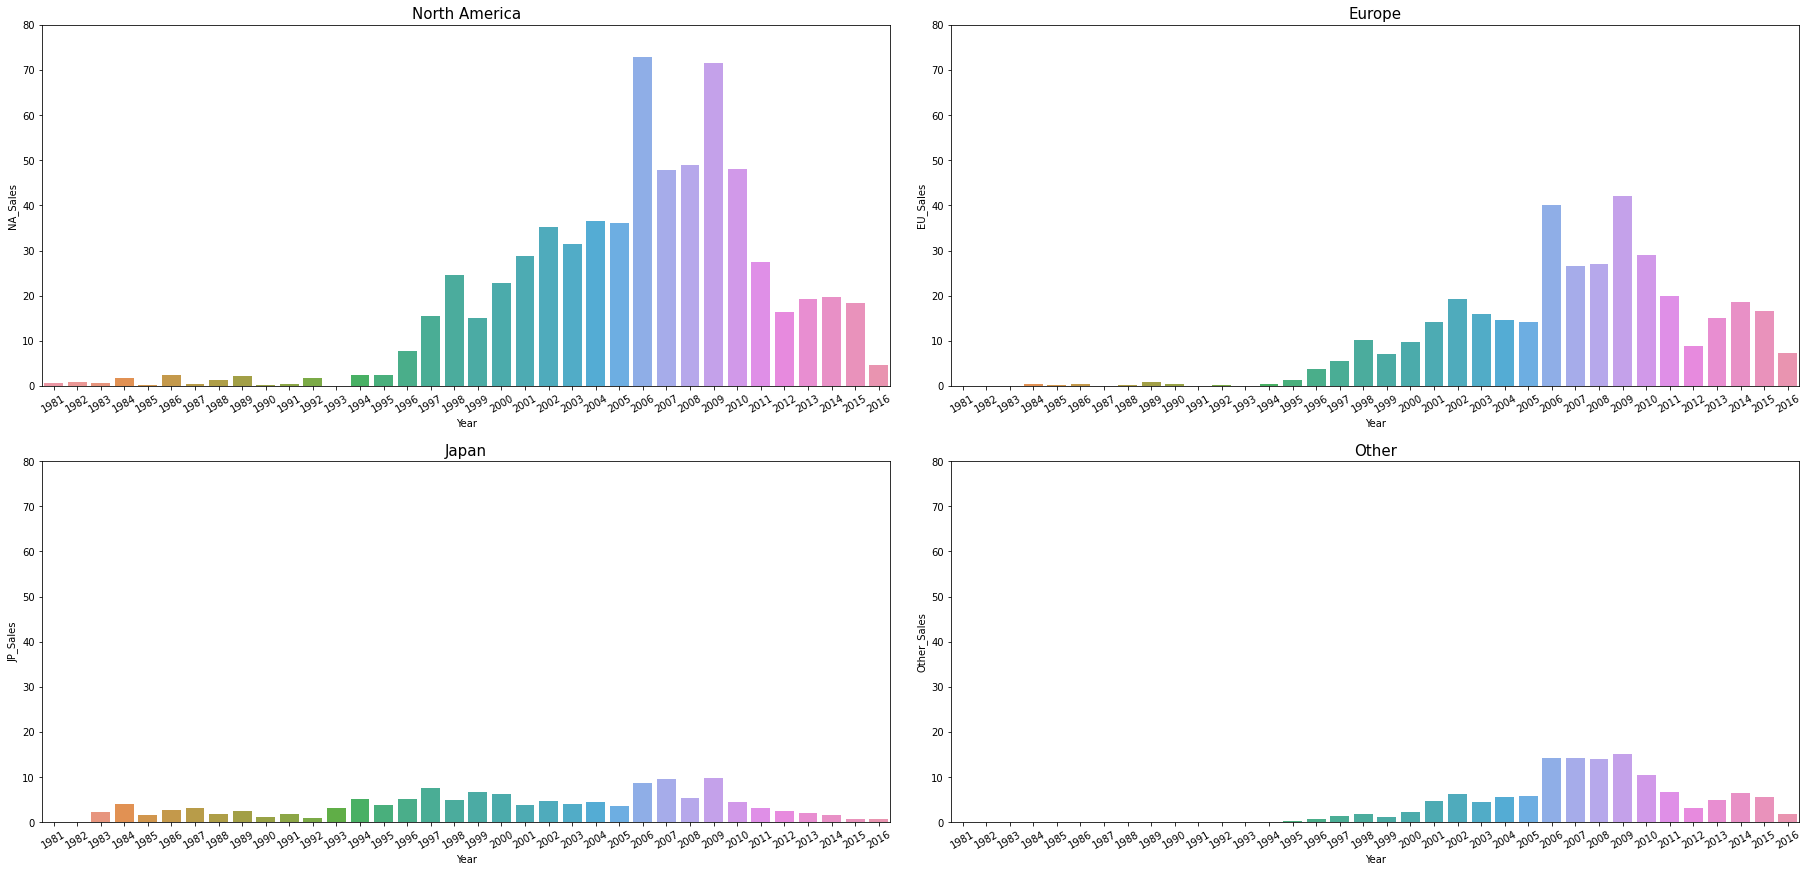

In [ ]:
#연도별  지역의 Sports 판매량
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  year_games = pd.DataFrame(df.loc[df['Genre']=="Sports"].groupby("Year")[feature].sum())
  sns.barplot(data=year_games, x=year_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(year_games.index, rotation=30)
  sales_name[feature][1].set_ylim(0,80)
plt.show()

일본을 제외하고 Sports 장르에서는 Action 장르처럼 2001년이후 증가하다가 2006년, 2009년도에 가장 판매량이 높고, 그 이후에 감소하는 것을 볼 수 있습니다. 

#### Shooter

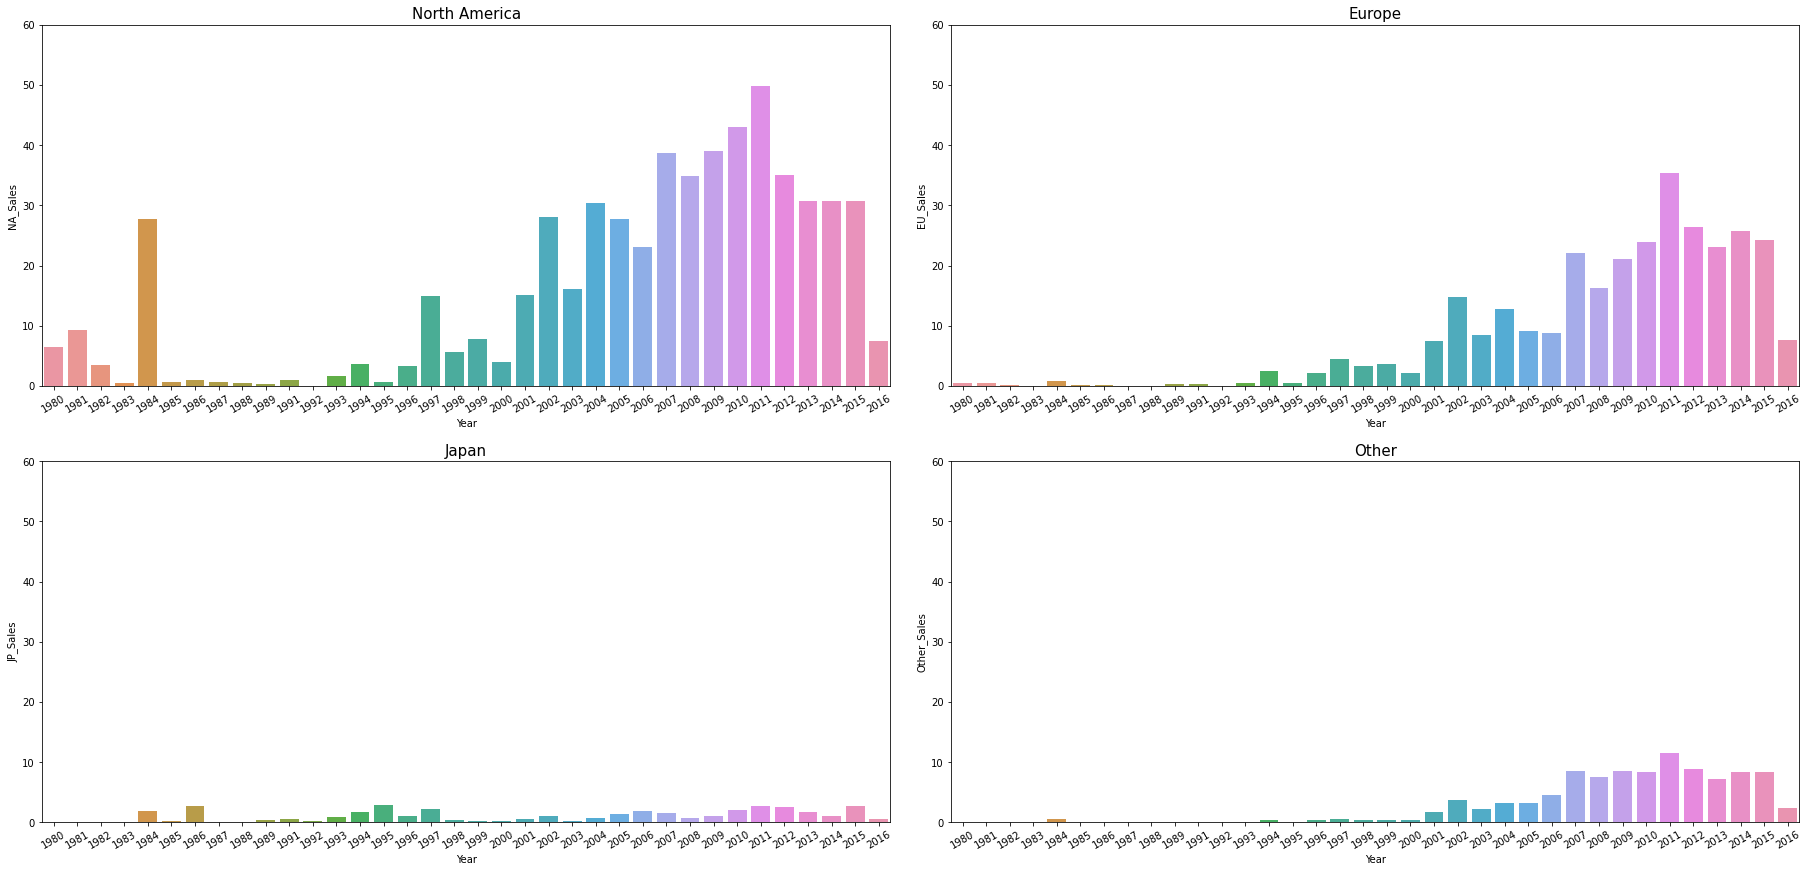

In [ ]:
#연도별  지역의 Sports 판매량
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  year_games = pd.DataFrame(df.loc[df['Genre']=="Shooter"].groupby("Year")[feature].sum())
  sns.barplot(data=year_games, x=year_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(year_games.index, rotation=30)
  sales_name[feature][1].set_ylim(0,60)
plt.show()

연도별 shooter 장르의 지역별 출고량입니다.

#### Role-Playing


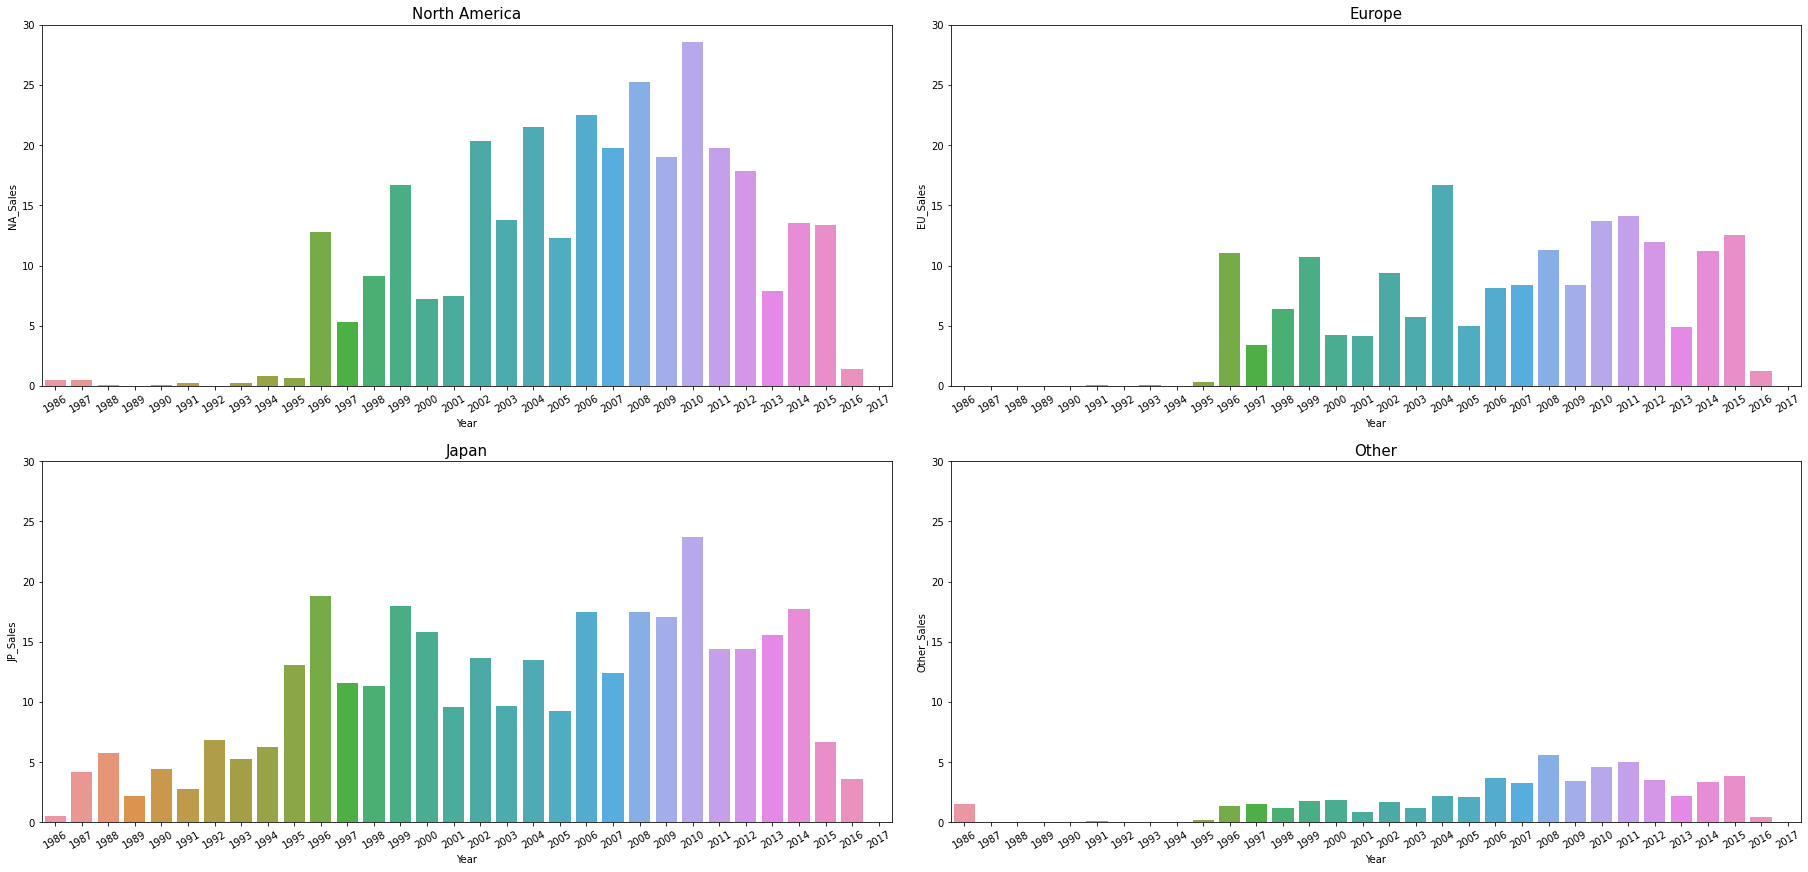

In [ ]:
#연도별 지역의 Role-Playing 판매량
sales_features = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

f, ax = plt.subplots(2,2,figsize=(25, 12), constrained_layout=True)
sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][0]),
              "Other_Sales" : ("Other",ax[1][1])}

for feature in sales_features:
  year_games = pd.DataFrame(df.loc[df['Genre']=="Role-Playing"].groupby("Year")[feature].sum())
  sns.barplot(data=year_games, x=year_games.index, y=feature, ax=sales_name[feature][1])
  sales_name[feature][1].set_title(sales_name[feature][0], fontsize=15)
  sales_name[feature][1].set_xticklabels(year_games.index, rotation=30)
  sales_name[feature][1].set_ylim(0,30)
plt.show()

##플랫폼과 회사의 연관성 분석
- 귀무가설 : 플랫폼과 회사는 독립(연관성이 없다)이다.
- 대립가설 : 플랫폼과 회사는 종속(연관성이 있다)이다.

In [ ]:
import scipy.stats as stats

platform_publisher_crosstab = pd.crosstab(df["Platform"], df["Publisher"])
statistic, pvalue, dof, exp =  stats.chi2_contingency(platform_publisher_crosstab)
display(platform_publisher_crosstab.head())
print("pvalue : ", pvalue)

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Platform,,,,,,,,,,,,,,,,,,,,,
2600,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,3,1,0,0,...,0,0,0,0,0,0,2,0,1,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DS,2,0,0,0,0,0,64,0,2,0,...,7,0,0,0,1,0,0,0,0,0


pvalue :  0.0


귀무가설을 기각하기 때문에 플랫폼과 회사는 연관성이 있을 가능성이 있다.

##결과

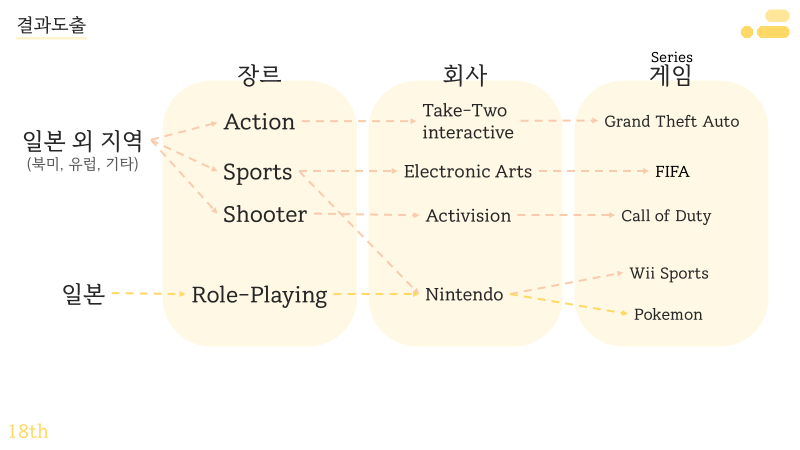

일본 외 지역(북미, 유럽, 기타)의 경우
1. Action 장르, Take-Two Interactive의 Grand Theft Auto 시리즈 게임 설계를 제안
2. Sports 장르, Electronic Arts의 FIFA 시리즈 게임과 Nintendo의 Wii Sports 시리즈를 제안
3. Shooter 장르, Activision의 Call of Duty 시리즈 게임을 제안

일본의 경우
1. Role-Playing 장르, Ninetend의 Pokemon 시리즈 게임을 제안

플랫폼의 경우는 회사와 연관이 되어있는 플랫폼을 선택하는 것을 제안